### This notebook plots niceley the electron-jet momemntum balance, 
### as well as the e-jet ∆phi distribution. Two observables of interest at the EIC

In [1]:
import ROOT
import numpy as np
from ROOT import TGraphErrors
from ROOT import TVectorT
import matplotlib.pyplot as plt
from matplotlib import ticker
from root_np_functions import *
from plotting_functions import *

Welcome to JupyROOT 6.22/06


## File and N_Missing Cut

In [2]:
latex_dir="./"
filename = "Histograms_Jet_Callibration_3.000000T.root"
filename_14T="Histograms_Jet_Callibration_1.400000T.root"
file = ROOT.TFile(filename)
file_14T = ROOT.TFile(filename_14T)
print(file)

Name: Histograms_Jet_Callibration_3.000000T.root Title: 


In [3]:
def TH1_to_numpy_wErrors(file, TH1_name,normalize=False,log_scale=False):    
    th1 = file.Get(TH1_name)
    Nx = th1.GetNbinsX()
    th1_array = np.zeros(Nx)
    th1_errors = np.zeros(Nx)
        
    for i in range(Nx):
        val = th1.GetBinContent(i+1)
        error = th1.GetBinError(i+1)
        if log_scale and val == 0:
            val = np.nan
        if not(log_scale) and val!=0 and error/val >= 0.5: 
            val=np.nan #skip converged fits with poor statistics
        th1_array[i] = val
        th1_errors[i] = error
    if normalize:
        N = th1.GetEntries()
        th1_array = th1_array/N
        th1_errors = th1_errors/N
    return th1_array, th1_errors

In [4]:
def TVT_to_numpy(file,TVectorT_name):
    TVectorT = file.Get(TVectorT_name)
    N = TVectorT.GetNoElements()
    np_bins = np.zeros(N)
    for i in range(N):
        np_bins[i] = TVectorT[i]
    return np_bins #return number of bin centers

In [5]:
def get_colors(color_map, N,test=False):
    evenly_spaced_interval = np.linspace(0, 1, N)
    colors = [color_map(x) for x in evenly_spaced_interval]
    if test:
        fig = plt.figure()
        x = np.linspace(0, 10, 100)
        for i in range(N):
            if i%2 == 0:
                plt.plot(np.sin(x+4*i),color=colors[i])
            else:
                plt.plot(np.cos(x+4*i),color=colors[i])
    return colors

cool = get_colors(plt.cm.winter,4,False)
warm = get_colors(plt.cm.autumn,4,False)

## dP/P Comparison

In [6]:
filename = "Histograms_Jet_Callibration_3.000000T.root"
filename_14T="Histograms_Jet_Callibration_1.400000T.root"
file = ROOT.TFile(filename)
file_14T = ROOT.TFile(filename_14T)
dpp_bins,dpp_centers,dpp_widths = get_th1_binning_np(file,"dP_P")
dpp,dpp_errors = TH1_to_numpy_wErrors(file,"dP_P",False)
print(dpp)

dpp_anticut,dpp_anticut_errors = TH1_to_numpy_wErrors(file,"PRecoJet_over_PTrueJet_anticut",False)
dpp_14T,dpp_errors_14T = TH1_to_numpy_wErrors(file_14T,"dP_P",False)
dpp_anticut_14T,dpp_anticut_errors_14T = TH1_to_numpy_wErrors(file_14T,"PRecoJet_over_PTrueJet_anticut",False)
print(np.nansum(dpp))
print(np.nansum(dpp_anticut))

[   54.    73.    54.    54.    68.    43.    72.    54.    48.    58.
    67.    75.    64.    84.    60.    90.    84.    84.    87.    99.
    93.    87.    87.    76.    95.    90.    87.    77.    99.   101.
    92.   107.   116.   102.   111.    91.   109.   102.   112.   110.
   109.   110.   138.   161.   157.   248.   426.   904.  2808. 10917.
 10187.  3165.  2047.  1996.  1941.  1945.  2073.  2085.  2149.  2155.
  2190.  2165.  2145.  2146.  2092.  2076.  2096.  2095.  1967.  1962.
  1998.  1882.  1949.  1865.  1945.  1882.  1855.  1807.  1721.  1789.
  1793.  1770.  1679.  1700.  1646.  1677.  1680.  1713.  1571.  1541.
  1656.  1517.  1586.  1502.  1455.  1475.  1463.  1384.  1272.  1445.]
120189.0
0.0


In [7]:
filename = "Histograms_Jet_Callibration_3.000000T.root"
filename_14T="Histograms_Jet_Callibration_1.400000T.root"
file = ROOT.TFile(filename)
file_14T = ROOT.TFile(filename_14T)

Apply_Cut = False
if (Apply_Cut):
    fig = plt.figure(figsize=(12,10))
    plt.tight_layout()
    plt.xlim(-0.1,0.25)
    plt.errorbar(dpp_centers,dpp,yerr=dpp_errors,
                fmt='o',color='blue',markersize=7,linewidth=3,
                label=r"Jets with $N_\mathrm{Missed} < 1$")

    plt.errorbar(dpp_centers,dpp_anticut,yerr=dpp_anticut_errors,
                fmt='o',color='red',markersize=7,linewidth=3,
                label=r"Jets with $N_\mathrm{Missed} \geq 1$")
    B_Field = 3.0
    plt.text(-0.09,16500,r'$B = %1.1f$ T'%(B_Field),ha="left",va="bottom",size=25,alpha=0.7)
    plt.legend(fontsize=25,loc='upper right')
    plt.ylabel("Counts",fontsize=25,y=0.935)
    plt.xlabel(r"$(p_\mathrm{jet}^\mathrm{Truth} - p_\mathrm{jet}^\mathrm{Reco})/p_\mathrm{jet}^\mathrm{Truth}$",fontsize=25,x=0.5)
    plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
    plt.savefig(latex_dir+"dPP_two_jets.pdf")
    
    fig = plt.figure(figsize=(12,10))
    plt.tight_layout()
    plt.xlim(-0.1,0.25)
    plt.errorbar(dpp_centers,dpp,yerr=dpp_errors,
                fmt='o',color='blue',markersize=7,linewidth=3,
                label=r"Jets with $N_\mathrm{Missed} < 1$")

    plt.errorbar(dpp_centers,dpp_anticut_14T,yerr=dpp_anticut_errors_14T,
                fmt='o',color='red',markersize=7,linewidth=3,
                label=r"Jets with $N_\mathrm{Missed} \geq 1$")
    B_Field = 1.4
    plt.text(-0.09,16500,r'$B = %1.1f$ T'%(B_Field),ha="left",va="bottom",size=25,alpha=0.7)
    plt.legend(fontsize=25,loc='upper right')
    plt.ylabel("Counts",fontsize=25,y=0.935)
    plt.xlabel(r"$(p_\mathrm{jet}^\mathrm{Truth} - p_\mathrm{jet}^\mathrm{Reco})/p_\mathrm{jet}^\mathrm{Truth}$",fontsize=25,x=0.5)
    plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
    plt.savefig(latex_dir+"dPP_two_jets_1.4TField.pdf")

# Colors

### Electron Jet $\Delta\varphi$

In [8]:
dPhi_bins,dPhi_centers,dPhi_widths = get_th1_binning_np(file,"dPhi_e_TrueJet")
TJ_dPhi, TJ_dPhi_errors = TH1_to_numpy_wErrors(file,"dPhi_e_TrueJet",True)
RJ_dPhi, RJ_dPhi_errors = TH1_to_numpy_wErrors(file,"dPhi_e_RecoJet",True)

Tesla14_RecodPhi,Tesla14_RecodPhi_errors = TH1_to_numpy_wErrors(file_14T,"dPhi_e_RecoJet",True)
Tesla14_TruthdPhi,Tesla14_TruthdPhi_errors = TH1_to_numpy_wErrors(file_14T,"dPhi_e_TrueJet",True)

In [9]:
#string_selections = ["NoCut_","RecoCut_NoMissing_","RecoConstitCuts_"]
string_selections = [""]
B_Strings =  ["3T","1.4T"]

file = ROOT.TFile("Histograms_Jet_Callibration_1.400000T.root") #startng file for binning

e_jet_dict = {}
e_jet_dict["edges"],e_jet_dict["centers"],e_jet_dict["width"] = get_th1_binning_np(file,"dPhi_e_TrueJet")
for Cut_String in string_selections:
    for B_string in B_Strings:
        filename = "Histograms_Jet_Callibration_1.400000T.root"
        if B_string == "3T":
            filename = "Histograms_Jet_Callibration_3.000000T.root"
        file = ROOT.TFile(filename)
        description_string = Cut_String+B_string
        e_jet_dict["Truth_"+description_string+"_vals"],e_jet_dict["Truth_"+description_string+"_errors"] = TH1_to_numpy_wErrors(file,"dPhi_e_TrueJet",True)
        e_jet_dict["Reco_"+description_string+"_vals"],e_jet_dict["Reco_"+description_string+"_errors"] = TH1_to_numpy_wErrors(file,"dPhi_e_RecoJet",True)

print(e_jet_dict.keys())
#np.save("./np_arrays/%s"%(B_Field)+Cut_String+"momentum",mom_dict)
#np.save("./np_arrays/%s"%(B_Field)+Cut_String+"rapidity",eta_dict)

dict_keys(['edges', 'centers', 'width', 'Truth_3T_vals', 'Truth_3T_errors', 'Reco_3T_vals', 'Reco_3T_errors', 'Truth_1.4T_vals', 'Truth_1.4T_errors', 'Reco_1.4T_vals', 'Reco_1.4T_errors'])


Reco_3T
Truth_3T
Reco_1.4T
Truth_1.4T


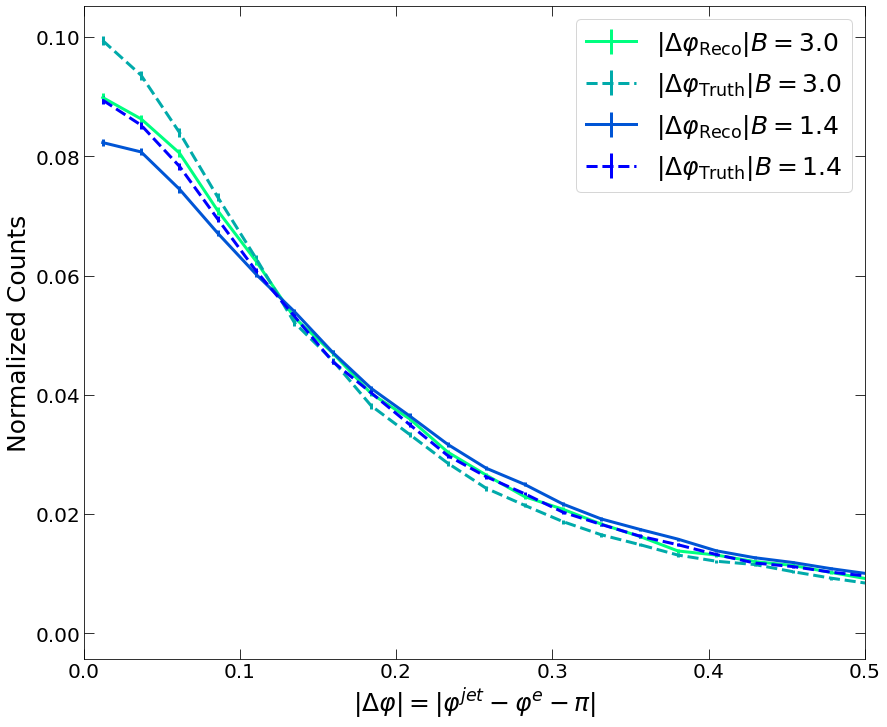

In [10]:
#string_selections = ["RecoCut_NoMissing_","RecoConstitCuts_"]
#text_labels = [r'$N_\mathrm{Missed} < 1$',r'No $N_\mathrm{Missed}$ Cut']
string_selections = [""]
text_labels = [r'No $N_\mathrm{Missed}$ Cut']

B_Fields = [3.0,1.4]
B_Strings =  ["3T","1.4T"]
truth_reco = ["Reco","Truth"]
cool = get_colors(plt.cm.winter, len(B_Strings)*len(truth_reco))

for Cut_String,label in zip(string_selections,text_labels):
    fig = plt.figure(figsize=(14,12))
    plt.tight_layout()
    plt.xlim(0,0.5)
    color_index = 3
    for B_string,B in zip(B_Strings, B_Fields):
        for r_t,fmt in zip(truth_reco,["-","--"]):
            key = r_t+"_"+Cut_String+B_string
            print(key)
            plt.errorbar(e_jet_dict["centers"],e_jet_dict[key+"_vals"],yerr=e_jet_dict[key+"_errors"],
                         fmt=fmt,color=cool[color_index],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{%s}| B = %1.1f$"%(r_t,B))
            #plt.text(0.025,0.0,label,ha="left",va="bottom",size=25,alpha=0.7)
            plt.ylabel("Normalized Counts",fontsize=25,y=0.5)
            plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
            plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
            color_index-=1
    plt.legend(fontsize=25)
    plt.savefig("./%s_azimuthal_correlation_field_overlay.pdf"%(Cut_String))

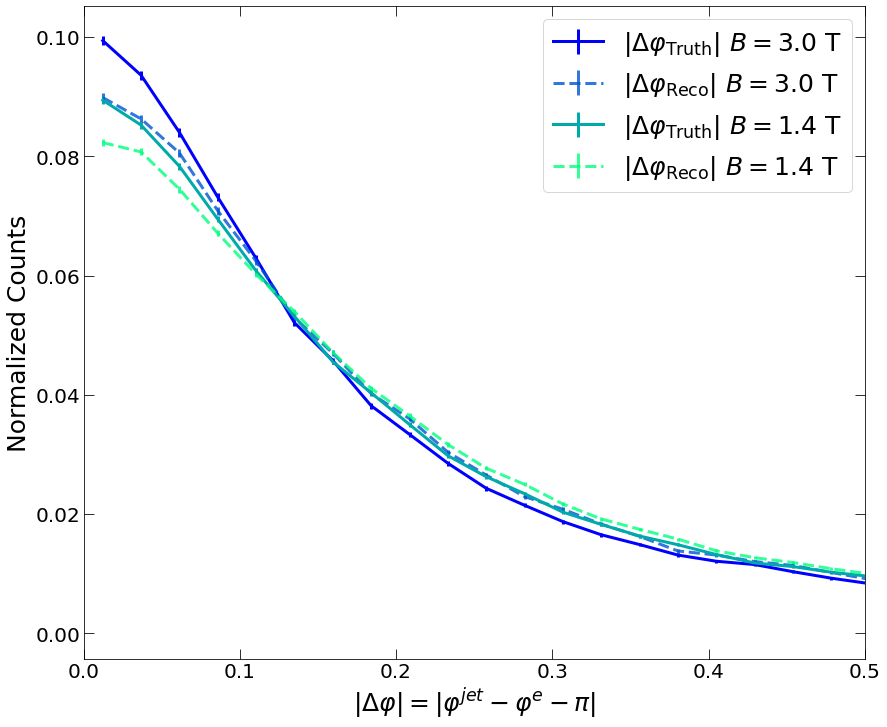

In [11]:
fig = plt.figure(figsize=(14,12))
plt.tight_layout()
plt.xlim(0,.5)
#3.0T Field
plt.errorbar(dPhi_centers,TJ_dPhi,yerr=TJ_dPhi_errors,
                         fmt='-',color=cool[0],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 3.0$ T" )

plt.errorbar(dPhi_centers,RJ_dPhi,yerr=RJ_dPhi_errors,
                         fmt='--',color=cool[1],linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T" )

#1.4T Field
plt.errorbar(dPhi_centers,Tesla14_TruthdPhi,yerr=Tesla14_TruthdPhi_errors,
                         fmt='-',color=cool[2],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 1.4$ T" )
                         #label=r"$|\varphi_{truth}^{jet} - \varphi^{e}-\pi|$")

plt.errorbar(dPhi_centers,Tesla14_RecodPhi,yerr=Tesla14_RecodPhi_errors,
                         fmt='--',color=cool[3],linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 1.4$ T")
                         #label=r"$|\varphi_{reco}^{jet} - \varphi^{e}-\pi|$")

plt.ylabel("Normalized Counts",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig(latex_dir+Cut_String+"azimuthal_correlations.pdf")

In [12]:
#string_selections = ["RecoCut_NoMissing_","RecoConstitCuts_"]
string_selections = [""]
B_Strings =  ["3T","1.4T"]

file = ROOT.TFile("Histograms_Jet_Callibration_1.400000T.root") #startng file for binning

frag_dict = {}
frag_dict["edges"],frag_dict["centers"],frag_dict["width"] = get_th1_binning_np(file,"fragmentation_fuction")
for Cut_String in string_selections:
    for B_string in B_Strings:
        filename = "Histograms_Jet_Callibration_1.400000T.root"
        if B_string == "3T":
            filename = "Histograms_Jet_Callibration_3.000000T.root"
        file = ROOT.TFile(filename)
        description_string = Cut_String+B_string
        frag_dict["Truth_"+description_string+"_vals"],frag_dict["Truth_"+description_string+"_errors"] = TH1_to_numpy_wErrors(file,"truth_fragmentation_fuction",True)
        frag_dict["Reco_"+description_string+"_vals"],frag_dict["Reco_"+description_string+"_errors"] = TH1_to_numpy_wErrors(file,"fragmentation_fuction",True)

Truth_3T
Reco_3T
Truth_1.4T
Reco_1.4T


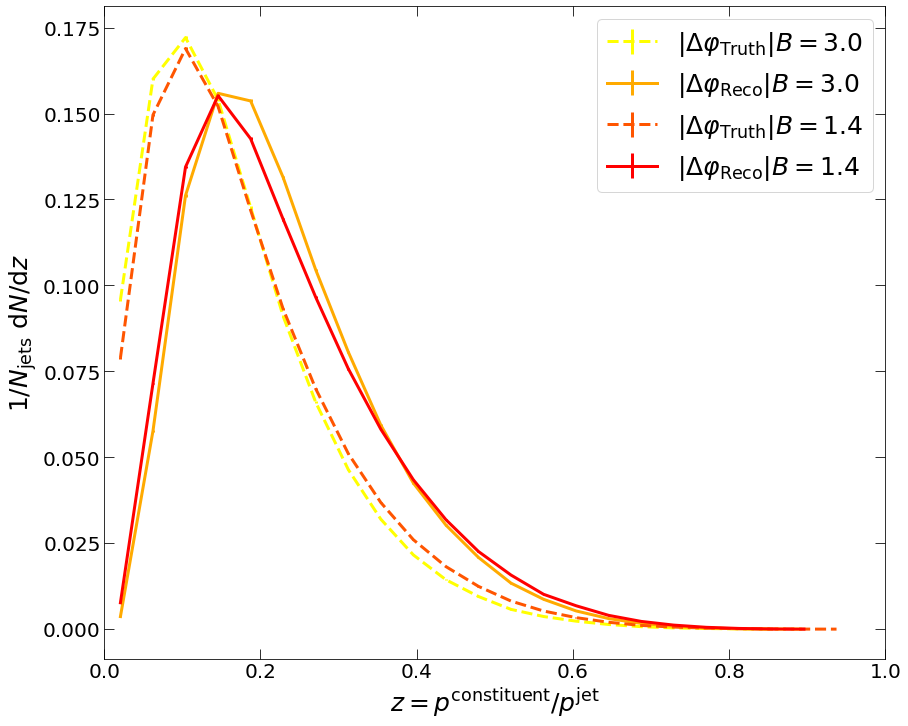

In [13]:
#string_selections = ["RecoCut_NoMissing_","RecoConstitCuts_"]
#text_labels = [r'$N_\mathrm{Missed} < 1$',r'No $N_\mathrm{Missed}$ Cut']
#string_selections = ["RecoConstitCuts_"]
string_selections = [""]
text_labels = [r'No $N_\mathrm{Missed}$ Cut']

B_Fields = [3.0,1.4]
B_Strings =  ["3T","1.4T"]
truth_reco = ["Truth","Reco"]
cool = get_colors(plt.cm.autumn, len(B_Strings)*len(truth_reco))

for Cut_String,label in zip(string_selections,text_labels):
    fig = plt.figure(figsize=(14,12))
    plt.tight_layout()
    plt.xlim(0,1.0)
    color_index = 3
    for B_string,B in zip(B_Strings, B_Fields):
        for r_t,fmt in zip(truth_reco,["--","-"]):
            key = r_t+"_"+Cut_String+B_string
            print(key)
            plt.errorbar(frag_dict["centers"],frag_dict[key+"_vals"],yerr=frag_dict[key+"_errors"],
                         fmt=fmt,color=cool[color_index],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{%s}| B = %1.1f$"%(r_t,B))
            #plt.text(0.025,0.0,label,ha="left",va="bottom",size=25,alpha=0.7)
            plt.ylabel(r"$1/N_\mathrm{jets} ~ \mathrm{d}N/ \mathrm{d}z$",fontsize=25,y=0.5)
            plt.xlabel(r"$z = p^\mathrm{constituent}/p^\mathrm{jet}$",fontsize=25,x=0.5)
            plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
            plt.legend(fontsize=25,loc='upper right')

            color_index-=1
    plt.legend(fontsize=25)
    plt.savefig("./%s_fragmentation_function_field_overlay.pdf"%(Cut_String))

## Truth Level Charged Jet Fragmentation Function

In [18]:
#3 Tesla
z_bins,z_centers,z_widths = get_th1_binning_np(file,"truth_fragmentation_fuction")
truth_ff, truth_ff_errors = TH1_to_numpy_wErrors(file,"truth_fragmentation_fuction")
reco_ff, reco_ff_errors = TH1_to_numpy_wErrors(file,"fragmentation_fuction")
jet_count_array = TVT_to_numpy(file,"TJet_Counter")
N_jets = jet_count_array[1]
truth_ff = truth_ff/N_jets/z_widths
truth_ff_errors = truth_ff_errors/N_jets/z_widths
reco_ff = reco_ff/N_jets/z_widths
reco_ff_errors = reco_ff_errors/N_jets/z_widths
print(truth_ff)

[1.96210936e+01 3.72019846e+01 4.20046033e+01 3.78182190e+01
 3.03059690e+01 2.31562580e+01 1.73883689e+01 1.27015498e+01
 9.16004296e+00 6.46984809e+00 4.52621349e+00 3.09406168e+00
 2.03120045e+00 1.31287402e+00 8.32693980e-01 4.96752084e-01
 2.68630761e-01 1.50171347e-01 7.46764871e-02 3.64175745e-02
 1.43215181e-02 4.70564166e-03 1.22755869e-03            nan]


In [20]:
#1.4 Tesla
z_bins,z_centers,z_widths = get_th1_binning_np(file_14T,"truth_fragmentation_fuction")
truth_14_ff, truth_14_ff_errors = TH1_to_numpy_wErrors(file_14T,"truth_fragmentation_fuction")
reco_14_ff, reco_14_ff_errors = TH1_to_numpy_wErrors(file_14T,"fragmentation_fuction")
jet_count_array = TVT_to_numpy(file_14T,"TJet_Counter")
N_jets = jet_count_array[1]
truth_14_ff = truth_14_ff/N_jets/z_widths
truth_14_ff_errors = truth_14_ff_errors/N_jets/z_widths
reco_14_ff = reco_14_ff/N_jets/z_widths
reco_14_ff_errors = reco_14_ff_errors/N_jets/z_widths
print(truth_14_ff)

[1.96210936e+01 3.72019846e+01 4.20046033e+01 3.78182190e+01
 3.03059690e+01 2.31562580e+01 1.73883689e+01 1.27015498e+01
 9.16004296e+00 6.46984809e+00 4.52621349e+00 3.09406168e+00
 2.03120045e+00 1.31287402e+00 8.32693980e-01 4.96752084e-01
 2.68630761e-01 1.50171347e-01 7.46764871e-02 3.64175745e-02
 1.43215181e-02 4.70564166e-03 1.22755869e-03            nan]


In [16]:
#normalization and bin width scaling (1/N_\mathrm{jets}dN/dz)


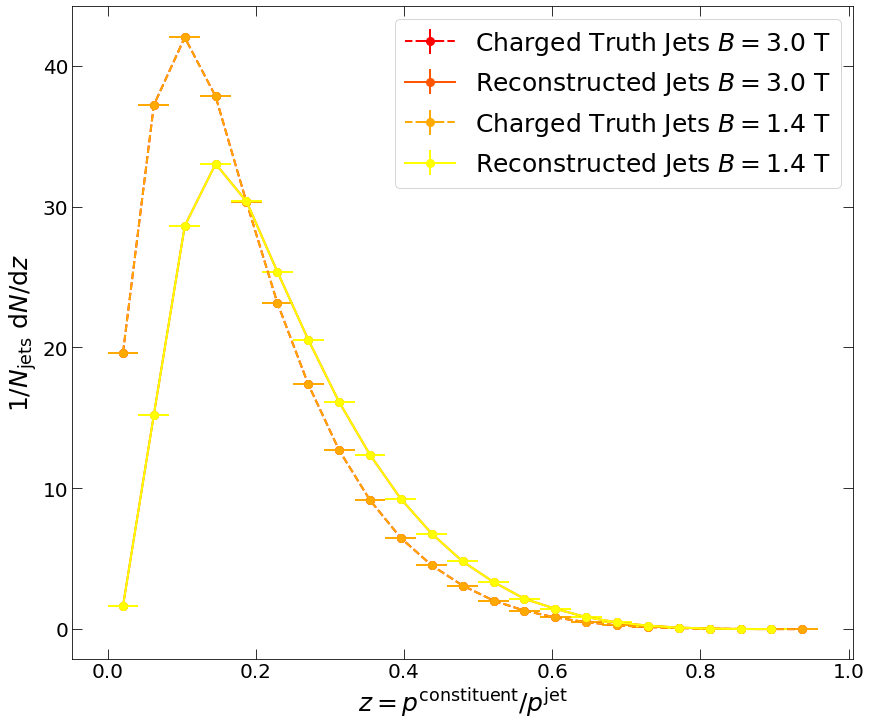

In [17]:
fig = plt.figure(figsize=(14,12))
plt.tight_layout()
plt.errorbar(z_centers,truth_ff,xerr=z_widths,yerr=truth_ff_errors,
                         fmt='--o',color=warm[0],markersize=8,linewidth=2,
                         label=r"Charged Truth Jets $B=3.0$ T")
plt.errorbar(z_centers,reco_ff,xerr=z_widths,yerr=reco_ff_errors,
                         fmt='-o',color=warm[1],markersize=8,linewidth=2,
                         label=r"Reconstructed Jets $B=3.0$ T")
plt.errorbar(z_centers,truth_14_ff,xerr=z_widths,yerr=truth_14_ff_errors,
                         fmt='--o',color=warm[2],markersize=8,linewidth=2,
                         label=r"Charged Truth Jets $B=1.4$ T")
plt.errorbar(z_centers,reco_14_ff,xerr=z_widths,yerr=reco_14_ff_errors,
                         fmt='-o',color=warm[3],markersize=8,linewidth=2,
                         label=r"Reconstructed Jets $B=1.4$ T")

plt.ylabel(r"$1/N_\mathrm{jets} ~ \mathrm{d}N/ \mathrm{d}z$",fontsize=25,y=0.5)
plt.xlabel(r"$z = p^\mathrm{constituent}/p^\mathrm{jet}$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig(latex_dir+Cut_String+"charged_jet_fragmentation.pdf")